https://mp.weixin.qq.com/s?__biz=MzIyNjM2MzQyNg==&mid=2247522357&idx=1&sn=1ad874536eb9bbf9c7173336a3cf86e4&chksm=e8734978df04c06e1f6ff58f47e057273d60b94a2765095c6f299fc74e72c9d2e4072900ce96&mpshare=1&scene=1&srcid=0806XnsTBKQtna6GfsjerrjN&sharer_sharetime=1596722917065&sharer_shareid=8724c7983f20914ec3c0c086bba89335&key=e5059de1c2a6cb5499d3205c912b512cac500785528ed8186848411061ed531f8b4be8191ff3570f4a455671a45e55cd83395a5e0cb20e4e76a0d75291f4653182682c4bc29b0db6c8d95b722747e78b&ascene=1&uin=MjA1MjAyODkxNg%3D%3D&devicetype=Windows+10+x64&version=62090529&lang=zh_CN&exportkey=AVCktgKlIVoDYjssFLnYyMo%3D&pass_ticket=nQImerEA15PRBBCI2zrlodKv9TgUBZP3ELl0Pra7euiJy9K5oqHz31jvTfajqk4P

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import RidgeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

C:\Users\jianghaitao1\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
# 读取数据
train_df = pd.read_csv('../../dataset/tainchi_nlp/train_set.csv',sep='\t',nrows=15000)

In [4]:
train_df.head()

,label,text
0,2,2967 6758 339 2021 1854 3731 4109 3792 4149 15...
1,11,4464 486 6352 5619 2465 4802 1452 3137 5778 54...
2,3,7346 4068 5074 3747 5681 6093 1777 2226 7354 6...
3,2,7159 948 4866 2109 5520 2490 211 3956 5520 549...
4,3,3646 3055 3055 2490 4659 6065 3370 5814 2465 5...


In [5]:
# Count Vectors+RidgeClassifier
vectorizer = CountVectorizer(max_features=3000)
train_test = vectorizer.fit_transform(train_df['text'])
clf = RidgeClassifier()
clf.fit(train_test[:10000], train_df['label'].values[:10000])
val_pred = clf.predict(train_test[10000:])
print(f1_score(train_df['label'].values[10000:], val_pred, average='macro'))

0.7413041490276625


In [6]:
# TF-IDF+RidgeClassifier
tfidf = TfidfVectorizer(ngram_range=(1,3), max_features=3000)
train_test = tfidf.fit_transform(train_df['text'])

clf = RidgeClassifier()
clf.fit(train_test[:10000], train_df['label'].values[:10000])

val_pred = clf.predict(train_test[10000:])
print(f1_score(train_df['label'].values[10000:], val_pred, average='macro'))

0.8721598830546126


C:\Users\jianghaitao1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  '"sag" solver requires many iterations to fit '
C:\Users\jianghaitao1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  '"sag" solver requires many iterations to fit '
C:\Users\jianghaitao1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "aut

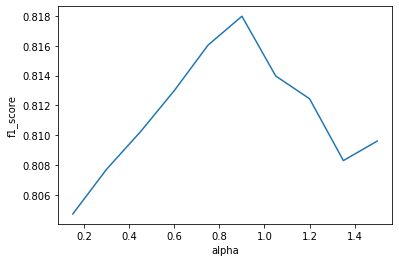

In [9]:
# 正则化参数对模型的影响
sample = train_df[0:5000]
n = int(2*len(sample)/3)
tfidf = TfidfVectorizer(ngram_range=(2,3), max_features=2500)
train_test = tfidf.fit_transform(sample['text'])
train_x = train_test[:n]
train_y = sample['label'].values[:n]
test_x = train_test[n:]
test_y = sample['label'].values[n:]
f1 = []
for i in range(10):
    clf = RidgeClassifier(alpha=0.15*(i+1),solver='sag')
    clf.fit(train_x,train_y)
    val_pred = clf.predict(test_x)
    f1.append(f1_score(test_y, val_pred, average='macro'))
plt.plot([0.15*(i+1) for i in range(10)],f1)
plt.xlabel('alpha')
plt.ylabel('f1_score')
plt.show()

C:\Users\jianghaitao1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  '"sag" solver requires many iterations to fit '
C:\Users\jianghaitao1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  '"sag" solver requires many iterations to fit '
C:\Users\jianghaitao1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "aut

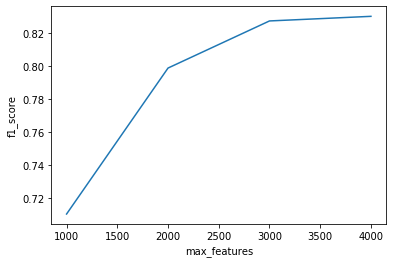

In [10]:
# max_features对模型的影响

f1 = []
features = [1000, 2000, 3000, 4000]
for i in range(4):
    tfidf = TfidfVectorizer(ngram_range=(2, 3), max_features=features[i])
    train_test = tfidf.fit_transform(sample['text'])
    train_x = train_test[:n]
    train_y = sample['label'].values[:n]
    test_x = train_test[n:]
    test_y = sample['label'].values[n:]
    clf = RidgeClassifier(alpha=0.1*(i+1), solver='sag')
    clf.fit(train_x, train_y)
    val_pred = clf.predict(test_x)
    f1.append(f1_score(test_y, val_pred, average='macro'))

plt.plot(features, f1)
plt.xlabel('max_features')
plt.ylabel('f1_score')
plt.show()